<a href="https://colab.research.google.com/github/JoelmirDias/IBM_Coursera/blob/main/Effectively_Dealing_with_Imbalance_Classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_csv('https://github.com/JoelmirDias/Trabalho/raw/main/winequality-red%20(1).csv', sep=';')

In [ ]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

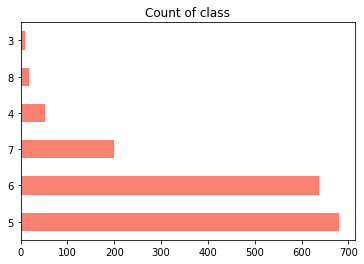

In [ ]:
df.quality.value_counts().plot(kind='barh', title='Count of class', color='salmon')

In [ ]:
def sea_plot(X, Y, label='Classes'):
  sns.scatterplot(X['alcohol'],X['chlorides'], hue=Y['quality'],
                  palette=c)
  plt.title(label)
  plt.legend(loc='upper right')
  plt.show

In [ ]:
def sea_plot1(X, Y, label='Classes'):
  sns.scatterplot(X['pH'],X['volatile acidity'], hue=Y['quality'],
                  palette=c1)
  plt.title(label)
  plt.legend(loc='upper right')
  plt.show

In [ ]:
c= sns.color_palette('Set2', 6)
c1= sns.color_palette('cool', 6)

In [ ]:
X = df.iloc[:,0:11].copy()
Y = df.iloc[:,11:].copy()
Y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


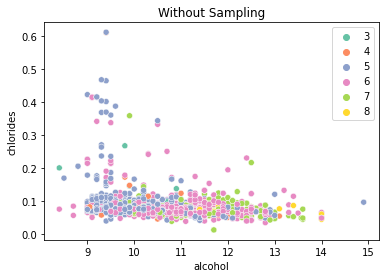

In [ ]:
sea_plot(X,Y,'Without Sampling')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


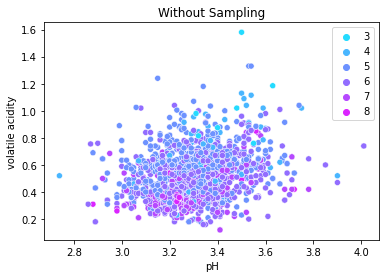

In [ ]:
sea_plot1(X,Y,'Without Sampling')

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

ran=RandomUnderSampler()
x_ran,y_ran=ran.fit_resample(X,Y)
#x_ran, y_ran = ran.fit_sample(X,Y) - Não funcionou na versão atual.
y_ran.quality.value_counts()

3    10
4    10
5    10
6    10
7    10
8    10
Name: quality, dtype: int64

In [ ]:
from imblearn.under_sampling import TomekLinks

tm = TomekLinks(sampling_strategy='all')
x_tm , y_tm = tm.fit_resample(X , Y)

y_tm.quality.value_counts()

5    589
6    533
7    166
4     32
8     10
3      5
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


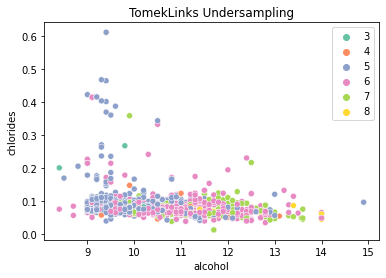

In [ ]:
sea_plot(x_tm,y_tm, 'TomekLinks Undersampling')

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_sm, y_sm = sm.fit_resample(X,Y)

y_sm.quality.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


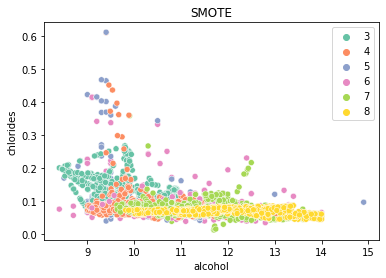

In [ ]:
sea_plot(x_sm, y_sm, 'SMOTE')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


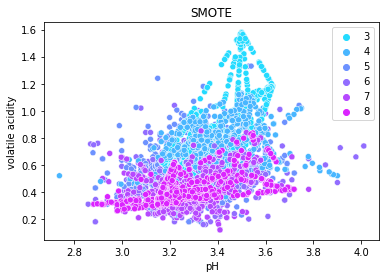

In [ ]:
sea_plot1(x_sm, y_sm, 'SMOTE')

In [ ]:
from imblearn.over_sampling import SVMSMOTE

svm=SVMSMOTE(sampling_strategy='not majority', k_neighbors=4)
x_svm, y_svm = svm.fit_resample(X,Y)

y_svm.quality.value_counts()

5    681
6    681
7    681
3    375
8    330
4    311
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


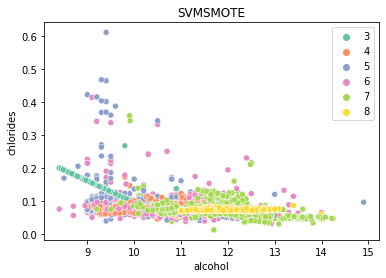

In [ ]:
sea_plot(x_svm, y_svm, 'SVMSMOTE')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


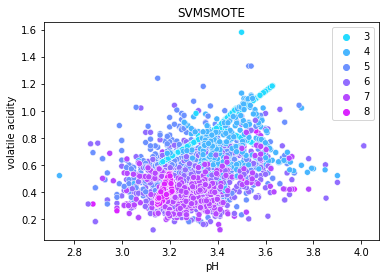

In [ ]:
sea_plot1(x_svm, y_svm, 'SVMSMOTE')

In [ ]:
from imblearn.combine import SMOTETomek

smtom = SMOTETomek(sampling_strategy='all')
x_smtm, y_smtm = smtom.fit_resample(X, Y)

y_smtm.quality.value_counts()

3    676
8    672
7    665
4    662
6    608
5    607
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


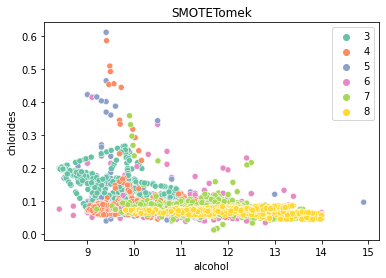

In [ ]:
sea_plot(x_smtm, y_smtm, 'SMOTETomek')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


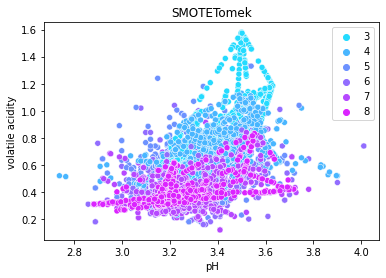

In [ ]:
sea_plot1(x_smtm, y_smtm, 'SMOTETomek')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_smx, test_smx, train_smy, test_smy = train_test_split(x_sm, y_sm, test_size=0.2)

In [ ]:
train_svmx, test_svmx, train_svmy, test_svmy = train_test_split(x_svm, y_svm, test_size=0.2)

In [ ]:
train_smtmx, test_smtmx, train_smtmy, test_smtmy = train_test_split(x_smtm, y_smtm, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm

In [ ]:
rf = RandomForestClassifier()
#para smote
rf.fit(train_smx, train_smy.values.ravel())
y_predsm=rf.predict(test_smx)

In [ ]:
cmat_sm=cm(test_smy, y_predsm)
cmat_sm

array([[154,   1,   0,   0,   0,   0],
       [  0, 126,   4,   0,   0,   0],
       [  2,   7,  89,  21,   4,   0],
       [  0,   5,  24,  79,  19,   2],
       [  0,   2,   1,   8, 130,   5],
       [  0,   0,   0,   0,   1, 134]])

In [ ]:
rf = RandomForestClassifier()
#para svm
rf.fit(train_svmx, train_svmy.values.ravel())
y_predsvm=rf.predict(test_svmx)
cmat_svm=cm(test_svmy, y_predsvm)
cmat_svm

array([[ 84,   0,   1,   0,   0,   0],
       [  0,  60,   4,   2,   1,   0],
       [  1,   4,  99,  22,   2,   0],
       [  0,   3,  34,  85,  13,   0],
       [  0,   0,   2,  17, 114,   0],
       [  0,   0,   0,   0,   4,  60]])

In [ ]:
rf = RandomForestClassifier()
#para SMOTETomek
rf.fit(train_smtmx, train_smtmy.values.ravel())
y_predsmtm=rf.predict(test_smtmx)
cmat_smtm=cm(test_smtmy, y_predsmtm)
cmat_smtm

array([[155,   0,   0,   0,   0,   0],
       [  1, 131,   4,   1,   0,   0],
       [  2,   7,  97,  21,   3,   0],
       [  1,   6,  20,  71,  14,   3],
       [  0,   0,   5,   5, 108,   1],
       [  0,   0,   0,   0,   0, 122]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

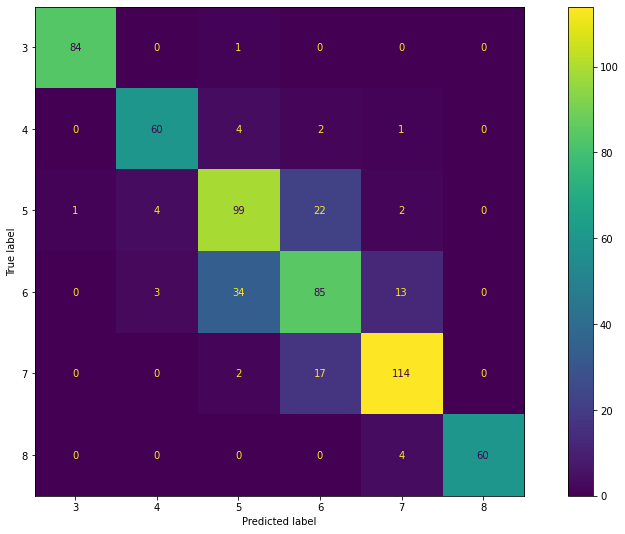

In [ ]:
plt.rcParams['figure.figsize']=[16,9]
cmd=ConfusionMatrixDisplay(cmat_svm, display_labels=['3','4','5','6','7','8'])
cmd.plot()

In [ ]:
from yellowbrick.classifier import ClassificationReport

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


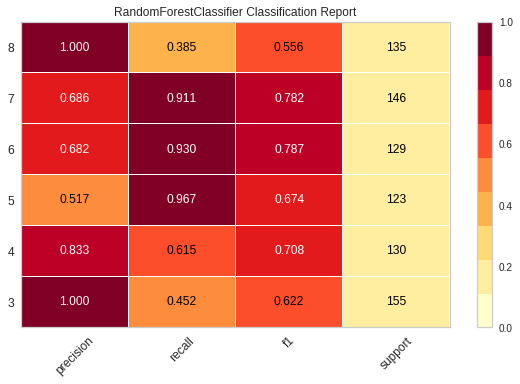

In [ ]:
clr = ClassificationReport(rf, support=True)
clr.fit(train_smx, train_smy)
clr.score(test_smx, test_smy)
clr.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cl1 = classification_report(test_smtmy, y_predsmtm, output_dict=True)
c_rep=pd.DataFrame(cl1).T
c_rep

,precision,recall,f1-score,support
3,0.974843,1.000000,0.987261,155.000000
4,0.909722,0.956204,0.932384,137.000000
5,0.769841,0.746154,0.757813,130.000000
6,0.724490,0.617391,0.666667,115.000000
7,0.864000,0.907563,0.885246,119.000000
8,0.968254,1.000000,0.983871,122.000000
accuracy,0.879177,0.879177,0.879177,0.879177
macro avg,0.868525,0.871219,0.868874,778.000000
weighted avg,0.874128,0.879177,0.875734,778.000000


In [ ]:
c_rep1=c_rep.copy()
c_rep1['Support']=c_rep1.support.apply(int)
c_rep1.style.background_gradient(cmap='viridis', subset=pd.IndexSlice['3':'8',:'recall'])

,precision,recall,f1-score,support,Support
3,0.974843,1.000000,0.987261,155.000000,155
4,0.909722,0.956204,0.932384,137.000000,137
5,0.769841,0.746154,0.757813,130.000000,130
6,0.724490,0.617391,0.666667,115.000000,115
7,0.864000,0.907563,0.885246,119.000000,119
8,0.968254,1.000000,0.983871,122.000000,122
accuracy,0.879177,0.879177,0.879177,0.879177,0
macro avg,0.868525,0.871219,0.868874,778.000000,778
weighted avg,0.874128,0.879177,0.875734,778.000000,778
